In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [96]:
path = './data/GreenhouseClimate.csv'
df = pd.read_csv(path)

In [97]:
df.head()

,%time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,43815.00000,100,35,509,31.6,0.3,96,8.8,0.0,49.9,...,NaN,0.0,NaN,25.0,26.0,263.0,NaN,10,NaN,1.2
1,43815.00347,100,85,484,31.8,0.3,96,9.2,0.0,48.5,...,NaN,0.0,NaN,25.0,26.0,265.0,NaN,10,NaN,1.2
2,43815.00694,100,96,475,31.8,0.3,96,9.1,0.0,46.8,...,NaN,0.0,NaN,25.0,26.0,265.0,NaN,10,NaN,1.2
3,43815.01042,100,96,501,32.0,0.3,96,8.5,0.0,45.2,...,NaN,0.0,NaN,25.0,26.0,267.0,NaN,10,NaN,1.2
4,43815.01389,100,96,487,32.0,0.3,96,8.5,0.0,43.8,...,NaN,0.0,NaN,25.0,26.0,267.0,NaN,10,NaN,1.2


In [98]:
df.columns

Index(['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'assim_sp', 'assim_vip',
       'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp',
       'int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp',
       'int_red_vip', 'int_white_sp', 'int_white_vip', 'pH_drain_PC',
       'scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip',
       't_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip',
       't_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't_ventlee_vip',
       't_ventwind_vip', 'water_sup', 'water_sup_intervals_sp_min',
       'water_sup_intervals_vip_min', 'window_pos_lee_sp',
       'window_pos_lee_vip'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   %time                        47809 non-null  float64
 1   AssimLight                   47809 non-null  object 
 2   BlackScr                     47809 non-null  object 
 3   CO2air                       47809 non-null  object 
 4   Cum_irr                      47809 non-null  object 
 5   EC_drain_PC                  47809 non-null  object 
 6   EnScr                        47809 non-null  object 
 7   HumDef                       47809 non-null  object 
 8   PipeGrow                     47809 non-null  object 
 9   PipeLow                      47809 non-null  object 
 10  Rhair                        47809 non-null  object 
 11  Tair                         47809 non-null  object 
 12  Tot_PAR                      47809 non-null  object 
 13  Tot_PAR_Lamps   

In [100]:
df.shape

(47809, 50)

In [101]:
start_date = pd.Timestamp.now().replace(year=2023, month=3, day=1, hour=0, minute=00, second=0, microsecond=0)
num_rows = len(df)
index = pd.date_range(start=start_date, periods=num_rows, freq='5T')
df.index = index

In [102]:
# Rinomina le colonne e seleziona solo le colonne di interesse
df.rename(columns={'Rhair': 'humidity', 'Tair': 'temperature'}, inplace=True)
df = df[['humidity', 'temperature']]

In [103]:
df.head()

,humidity,temperature
2023-03-01 00:00:00,51.9,21.0
2023-03-01 00:05:00,51.3,21.5
2023-03-01 00:10:00,52.2,21.6
2023-03-01 00:15:00,54.6,21.3
2023-03-01 00:20:00,54.4,21.4


In [104]:
# Check if all values are numeric
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

humidity       False
temperature    False
dtype: bool

In [105]:
# Convert column values to numbers
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')  # errors='coerce' convertirà i valori non numerici in NaN
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')

In [106]:
# Check NaN values
nan_count = df.isnull().sum()  # Number of np.NaN for each column
nan_count

humidity       71
temperature    71
dtype: int64

In [107]:
df = df.interpolate(method='linear')

In [108]:
# Check NaN values
nan_count = df.isnull().sum()  # Number of np.NaN for each column
nan_count

humidity       0
temperature    0
dtype: int64

In [109]:
# Resample the entire DataFrame over desired # of hours
df = df.resample("3H").mean().interpolate(method='linear')

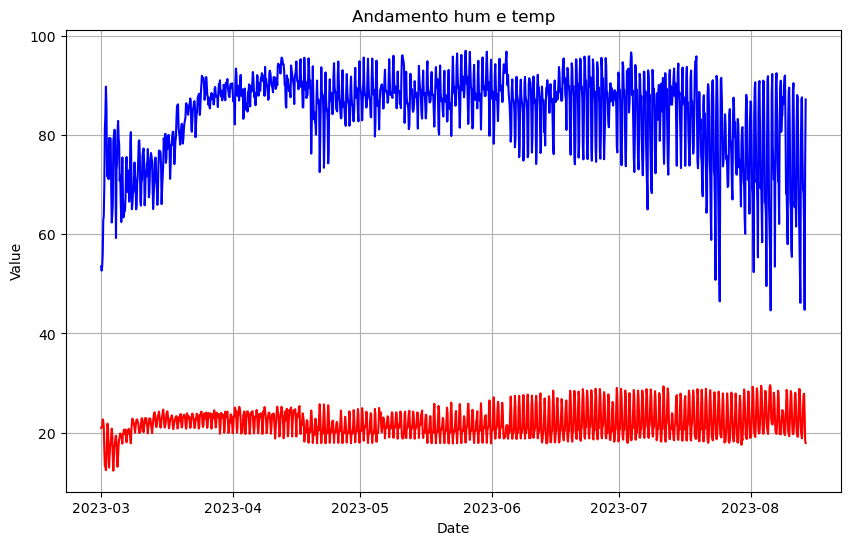

In [110]:
# Crea il plot della time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['humidity'], color='blue', linestyle='-')
plt.plot(df.index, df['temperature'], color='red', linestyle='-')
plt.title('Andamento hum e temp')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [111]:
df.tail()

,humidity,temperature
2023-08-13 12:00:00,68.130556,27.569444
2023-08-13 15:00:00,61.527778,27.863889
2023-08-13 18:00:00,44.769444,24.222222
2023-08-13 21:00:00,73.513889,18.472222
2023-08-14 00:00:00,87.200000,17.900000
